# Bayesian Sampler Examples

Examples of running each sampler avaiable in 3ML.


Before, that, let's discuss setting up configuration default sampler with default parameters. We can set in our configuration a default algorithm and default setup parameters for the samplers. This can ease fitting when we are doing exploratory data analysis.

With any of the samplers, you can pass keywords to access their setups. Read each pacakges documentation for more details.


In [1]:
from threeML import *
from threeML.plugins.XYLike import XYLike

import numpy as np
import dynesty
from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
silence_warnings()
set_threeML_style()

23:58:05 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=209043;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=825994;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#50\50]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=36392;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=589836;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#71\71]8;;\
                  will not be available.                                                                           

23:58:06 WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=951549;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=814179;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#36\36]8;;\
                  available                                                                                        

In [2]:
threeML_config.bayesian.default_sampler

<Sampler.emcee: 'emcee'>

In [3]:
threeML_config.bayesian.emcee_setup

{'n_burnin': None, 'n_iterations': 500, 'n_walkers': 50, 'seed': 5123}

If you simply run `bayes_analysis.sample()` the default sampler and its default parameters will be used.


Let's make some data to fit.

23:58:08 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=165813;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=830236;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#92\92]8;;\

23:58:09 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=465704;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=834749;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#92\92]8;;\

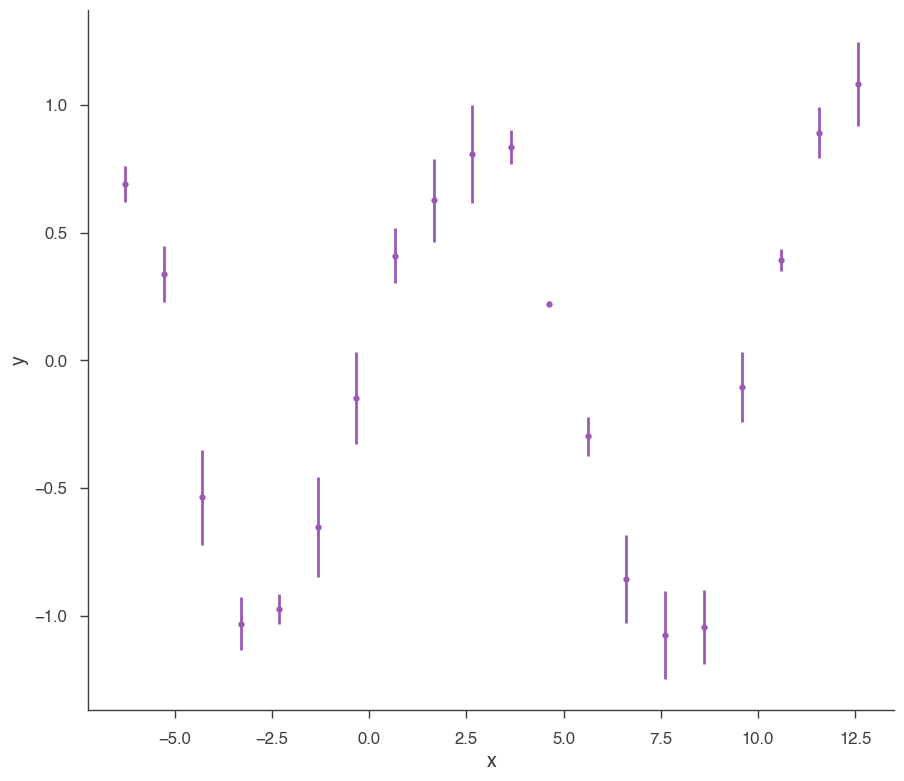

In [4]:
sin = Sin(K=1, f=0.1)
sin.phi.fix = True
sin.K.prior = Log_uniform_prior(lower_bound=0.5, upper_bound=1.5)
sin.f.prior = Uniform_prior(lower_bound=0, upper_bound=0.5)

model = Model(PointSource("demo", 0, 0, spectral_shape=sin))

x = np.linspace(-2 * np.pi, 4 * np.pi, 20)
yerr = np.random.uniform(0.01, 0.2, 20)


xyl = XYLike.from_function("demo", sin, x, yerr)
xyl.plot()

bayes_analysis = BayesianAnalysis(model, DataList(xyl))

## emcee

         INFO      sampler set to emcee                                                    ]8;id=427404;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=738699;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

23:58:13 INFO      Mean acceptance fraction: 0.7221000000000001                                ]8;id=286673;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py\emcee_sampler.py]8;;\:]8;id=360235;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py#157\157]8;;\

23:58:14 INFO      fit restored to maximum of posterior                                         ]8;id=817715;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=84479;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=430433;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=736714;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.013 -0.025 +0.030,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.0032 +/- 0.0034) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-8.437537
total,-8.437537


Values of statistical measures:

,statistical measures
AIC,21.580955
BIC,22.866538
DIC,20.948632
PDIC,2.035506


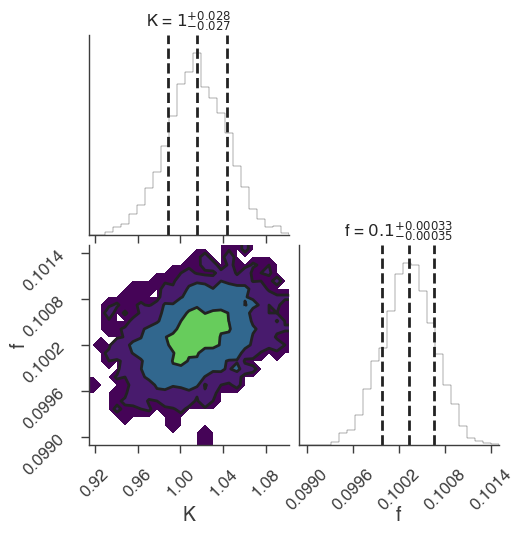

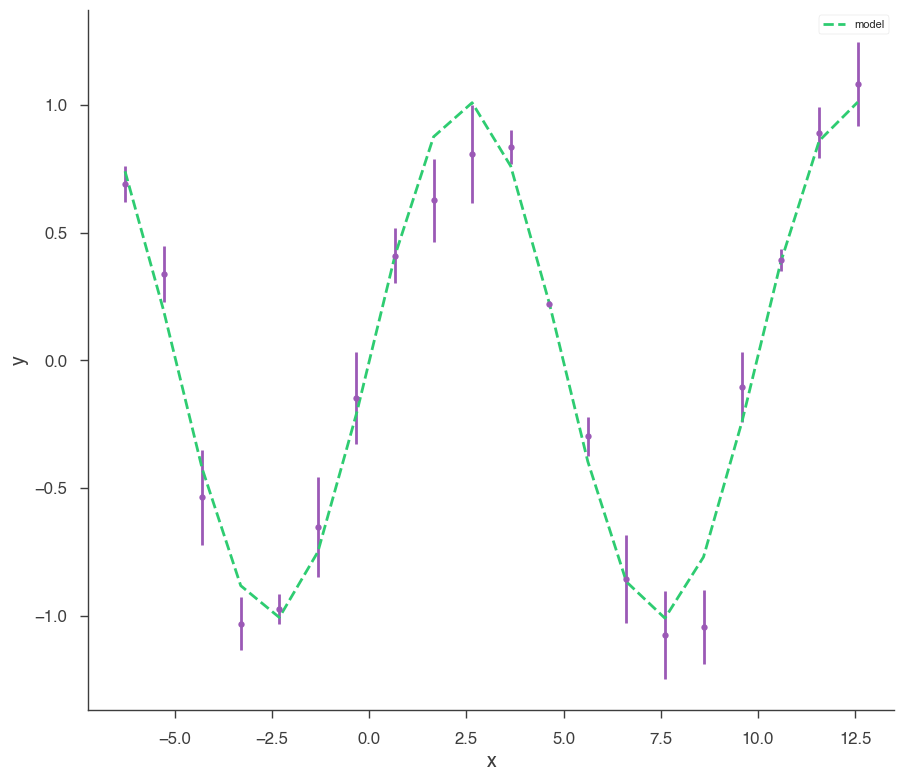

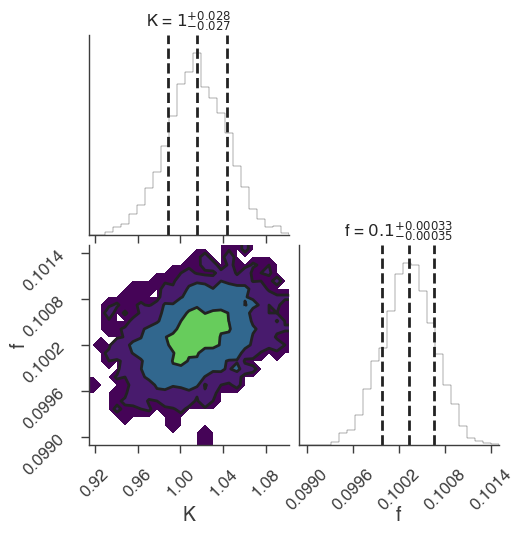

In [5]:
bayes_analysis.set_sampler("emcee")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## multinest

23:58:15 INFO      sampler set to multinest                                                ]8;id=194462;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=723694;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =    2
 *****************************************************


  analysing data from chains/fit-.txt ln(ev)=  -17.390961402063731      +/-  0.14087329152834283     
 Total Likelihood Evaluations:         6673
 Sampling finished. Exiting MultiNest



23:58:17 INFO      fit restored to maximum of posterior                                         ]8;id=883825;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=566988;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=311021;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=637579;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.012 -0.027 +0.026,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.0032 -0.004 +0.0033) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-8.439492
total,-8.439492


Values of statistical measures:

,statistical measures
AIC,21.584867
BIC,22.870449
DIC,21.012881
PDIC,2.066887
log(Z),-7.552799


         INFO      deleting the chain directory chains                                     ]8;id=710521;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py\multinest_sampler.py]8;;\:]8;id=781855;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py#255\255]8;;\

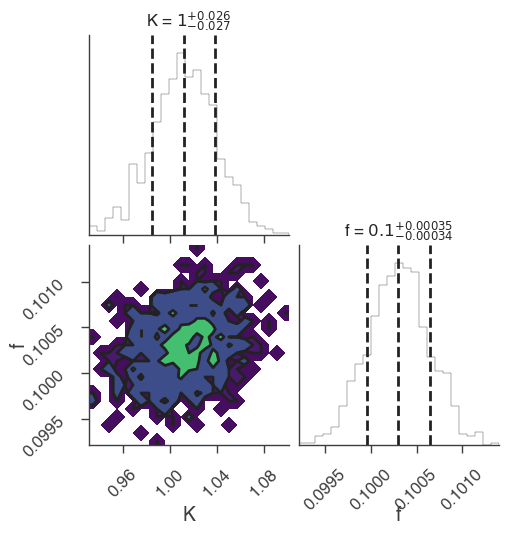

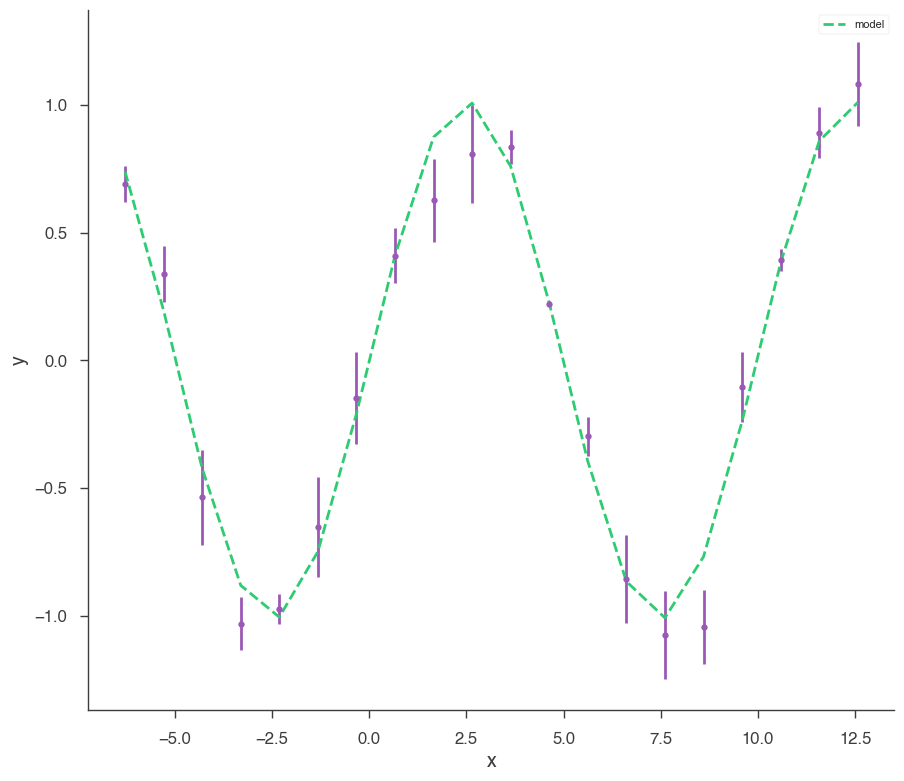

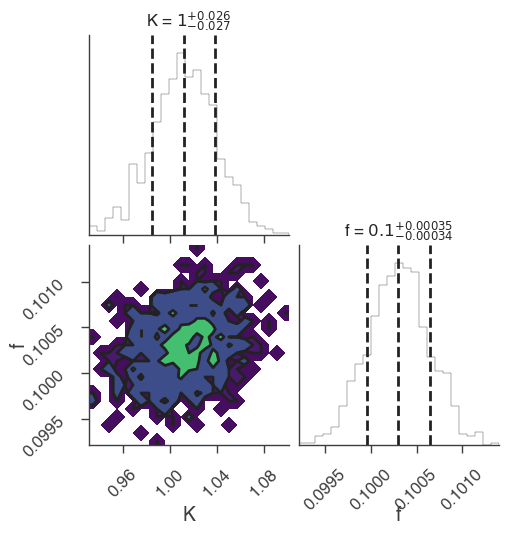

In [6]:
bayes_analysis.set_sampler("multinest")
bayes_analysis.sampler.setup(n_live_points=400, resume=False, auto_clean=True)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## dynesty

         INFO      sampler set to dynesty_nested                                           ]8;id=352881;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=615399;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

0it [00:00, ?it/s]

132it [00:00, 1315.79it/s, bound: 0 | nc: 3 | ncall: 556 | eff(%): 23.741 | loglstar:   -inf < -4197.071 <    inf | logz: -4204.085 +/-  0.132 | dlogz: 4188.333 >  0.409]

264it [00:00, 1219.09it/s, bound: 0 | nc: 2 | ncall: 744 | eff(%): 35.484 | loglstar:   -inf < -2428.523 <    inf | logz: -2435.866 +/-  0.135 | dlogz: 2431.832 >  0.409]

387it [00:00, 1059.32it/s, bound: 0 | nc: 1 | ncall: 996 | eff(%): 38.855 | loglstar:   -inf < -1740.790 <    inf | logz: -1748.147 +/-  0.129 | dlogz: 1721.808 >  0.409]

495it [00:00, 890.34it/s, bound: 0 | nc: 5 | ncall: 1312 | eff(%): 37.729 | loglstar:   -inf < -1335.319 <    inf | logz: -1343.098 +/-  0.136 | dlogz: 1317.455 >  0.409]

588it [00:00, 731.64it/s, bound: 0 | nc: 1 | ncall: 1689 | eff(%): 34.813 | loglstar:   -inf < -1142.450 <    inf | logz: -1150.598 +/-  0.142 | dlogz: 1127.920 >  0.409]

666it [00:00, 649.87it/s, bound: 0 | nc: 7 | ncall: 2022 | eff(%): 32.938 | loglstar:   -inf < -1021.133 <    inf | logz: -1028.332 +/-  0.128 | dlogz: 1000.401 >  0.409]

735it [00:00, 586.02it/s, bound: 0 | nc: 1 | ncall: 2350 | eff(%): 31.277 | loglstar:   -inf < -943.248 <    inf | logz: -950.375 +/-  0.124 | dlogz: 923.526 >  0.409]   

796it [00:01, 515.64it/s, bound: 0 | nc: 6 | ncall: 2716 | eff(%): 29.308 | loglstar:   -inf < -880.563 <    inf | logz: -887.620 +/-  0.132 | dlogz: 874.834 >  0.409]

850it [00:01, 456.73it/s, bound: 0 | nc: 20 | ncall: 3214 | eff(%): 26.447 | loglstar:   -inf < -814.466 <    inf | logz: -823.156 +/-  0.143 | dlogz: 814.506 >  0.409]

898it [00:01, 378.99it/s, bound: 0 | nc: 5 | ncall: 3680 | eff(%): 24.402 | loglstar:   -inf < -743.368 <    inf | logz: -751.886 +/-  0.139 | dlogz: 742.128 >  0.409] 

938it [00:01, 349.16it/s, bound: 0 | nc: 9 | ncall: 4043 | eff(%): 23.201 | loglstar:   -inf < -708.166 <    inf | logz: -716.904 +/-  0.141 | dlogz: 707.279 >  0.409]

975it [00:01, 335.10it/s, bound: 0 | nc: 15 | ncall: 4404 | eff(%): 22.139 | loglstar:   -inf < -668.866 <    inf | logz: -676.439 +/-  0.134 | dlogz: 665.591 >  0.409]

1010it [00:01, 285.45it/s, bound: 0 | nc: 1 | ncall: 4848 | eff(%): 20.833 | loglstar:   -inf < -641.251 <    inf | logz: -649.640 +/-  0.141 | dlogz: 639.399 >  0.409]

1040it [00:02, 280.21it/s, bound: 0 | nc: 9 | ncall: 5151 | eff(%): 20.190 | loglstar:   -inf < -615.840 <    inf | logz: -623.631 +/-  0.135 | dlogz: 612.672 >  0.409]

1069it [00:02, 239.41it/s, bound: 0 | nc: 8 | ncall: 5570 | eff(%): 19.192 | loglstar:   -inf < -584.123 <    inf | logz: -592.141 +/-  0.137 | dlogz: 581.157 >  0.409]

1094it [00:02, 216.55it/s, bound: 0 | nc: 15 | ncall: 5935 | eff(%): 18.433 | loglstar:   -inf < -559.997 <    inf | logz: -568.440 +/-  0.135 | dlogz: 557.473 >  0.409]

1117it [00:02, 207.24it/s, bound: 0 | nc: 6 | ncall: 6232 | eff(%): 17.924 | loglstar:   -inf < -539.368 <    inf | logz: -547.924 +/-  0.140 | dlogz: 537.230 >  0.409] 

1138it [00:02, 190.69it/s, bound: 0 | nc: 15 | ncall: 6563 | eff(%): 17.340 | loglstar:   -inf < -528.441 <    inf | logz: -536.682 +/-  0.135 | dlogz: 525.553 >  0.409]

1158it [00:02, 154.45it/s, bound: 0 | nc: 6 | ncall: 7068 | eff(%): 16.384 | loglstar:   -inf < -516.463 <    inf | logz: -525.008 +/-  0.137 | dlogz: 513.936 >  0.409] 

1175it [00:03, 145.52it/s, bound: 0 | nc: 30 | ncall: 7402 | eff(%): 15.874 | loglstar:   -inf < -505.499 <    inf | logz: -513.775 +/-  0.137 | dlogz: 502.490 >  0.409]

1194it [00:03, 154.94it/s, bound: 0 | nc: 10 | ncall: 7637 | eff(%): 15.634 | loglstar:   -inf < -496.989 <    inf | logz: -505.357 +/-  0.133 | dlogz: 493.899 >  0.409]

1213it [00:03, 160.88it/s, bound: 0 | nc: 27 | ncall: 7888 | eff(%): 15.378 | loglstar:   -inf < -490.543 <    inf | logz: -498.043 +/-  0.130 | dlogz: 486.334 >  0.409]

1230it [00:03, 142.47it/s, bound: 0 | nc: 14 | ncall: 8272 | eff(%): 14.869 | loglstar:   -inf < -484.654 <    inf | logz: -491.945 +/-  0.129 | dlogz: 480.117 >  0.409]

1245it [00:03, 133.01it/s, bound: 0 | nc: 4 | ncall: 8601 | eff(%): 14.475 | loglstar:   -inf < -481.283 <    inf | logz: -488.639 +/-  0.128 | dlogz: 476.780 >  0.409] 

1261it [00:03, 138.51it/s, bound: 0 | nc: 16 | ncall: 8845 | eff(%): 14.257 | loglstar:   -inf < -480.086 <    inf | logz: -486.870 +/-  0.122 | dlogz: 474.890 >  0.409]

1276it [00:03, 128.08it/s, bound: 0 | nc: 4 | ncall: 9185 | eff(%): 13.892 | loglstar:   -inf < -478.183 <    inf | logz: -485.718 +/-  0.120 | dlogz: 473.750 >  0.409] 

1290it [00:03, 113.99it/s, bound: 0 | nc: 6 | ncall: 9577 | eff(%): 13.470 | loglstar:   -inf < -448.482 <    inf | logz: -457.500 +/-  0.146 | dlogz: 446.395 >  0.409]

1303it [00:04, 112.44it/s, bound: 0 | nc: 63 | ncall: 9863 | eff(%): 13.211 | loglstar:   -inf < -435.135 <    inf | logz: -443.679 +/-  0.141 | dlogz: 432.080 >  0.409]

1315it [00:04, 113.59it/s, bound: 0 | nc: 45 | ncall: 10105 | eff(%): 13.013 | loglstar:   -inf < -414.132 <    inf | logz: -422.992 +/-  0.145 | dlogz: 411.706 >  0.409]

1327it [00:04, 111.18it/s, bound: 0 | nc: 1 | ncall: 10378 | eff(%): 12.787 | loglstar:   -inf < -399.660 <    inf | logz: -409.493 +/-  0.152 | dlogz: 399.470 >  0.409] 

1339it [00:04, 108.10it/s, bound: 0 | nc: 22 | ncall: 10662 | eff(%): 12.559 | loglstar:   -inf < -388.830 <    inf | logz: -398.360 +/-  0.146 | dlogz: 387.301 >  0.409]

1350it [00:04, 108.27it/s, bound: 0 | nc: 2 | ncall: 10904 | eff(%): 12.381 | loglstar:   -inf < -377.702 <    inf | logz: -386.974 +/-  0.147 | dlogz: 375.793 >  0.409] 

1363it [00:04, 104.32it/s, bound: 0 | nc: 88 | ncall: 11230 | eff(%): 12.137 | loglstar:   -inf < -359.530 <    inf | logz: -369.189 +/-  0.148 | dlogz: 358.127 >  0.409]

1374it [00:04, 91.59it/s, bound: 0 | nc: 146 | ncall: 11618 | eff(%): 11.826 | loglstar:   -inf < -341.151 <    inf | logz: -350.939 +/-  0.151 | dlogz: 340.241 >  0.409]

1384it [00:04, 91.83it/s, bound: 0 | nc: 26 | ncall: 11879 | eff(%): 11.651 | loglstar:   -inf < -334.467 <    inf | logz: -343.001 +/-  0.139 | dlogz: 330.997 >  0.409] 

1394it [00:05, 90.59it/s, bound: 0 | nc: 15 | ncall: 12159 | eff(%): 11.465 | loglstar:   -inf < -323.850 <    inf | logz: -333.774 +/-  0.153 | dlogz: 323.470 >  0.409]

1407it [00:05, 99.07it/s, bound: 0 | nc: 36 | ncall: 12413 | eff(%): 11.335 | loglstar:   -inf < -307.996 <    inf | logz: -316.561 +/-  0.142 | dlogz: 304.574 >  0.409]

1418it [00:05, 101.32it/s, bound: 0 | nc: 9 | ncall: 12658 | eff(%): 11.202 | loglstar:   -inf < -293.126 <    inf | logz: -302.427 +/-  0.146 | dlogz: 290.732 >  0.409]

1431it [00:05, 107.84it/s, bound: 0 | nc: 19 | ncall: 12907 | eff(%): 11.087 | loglstar:   -inf < -277.358 <    inf | logz: -286.731 +/-  0.147 | dlogz: 275.069 >  0.409]

1442it [00:05, 93.10it/s, bound: 0 | nc: 34 | ncall: 13292 | eff(%): 10.849 | loglstar:   -inf < -271.210 <    inf | logz: -279.754 +/-  0.140 | dlogz: 267.608 >  0.409] 

1452it [00:05, 71.99it/s, bound: 0 | nc: 28 | ncall: 13845 | eff(%): 10.488 | loglstar:   -inf < -259.520 <    inf | logz: -268.878 +/-  0.144 | dlogz: 257.037 >  0.409]

1461it [00:05, 75.42it/s, bound: 0 | nc: 16 | ncall: 14088 | eff(%): 10.371 | loglstar:   -inf < -249.811 <    inf | logz: -259.140 +/-  0.148 | dlogz: 247.466 >  0.409]

1471it [00:05, 74.67it/s, bound: 0 | nc: 105 | ncall: 14422 | eff(%): 10.200 | loglstar:   -inf < -243.758 <    inf | logz: -252.970 +/-  0.149 | dlogz: 241.364 >  0.409]

1480it [00:06, 73.77it/s, bound: 0 | nc: 15 | ncall: 14733 | eff(%): 10.045 | loglstar:   -inf < -235.881 <    inf | logz: -245.031 +/-  0.149 | dlogz: 233.288 >  0.409] 

1488it [00:06, 55.62it/s, bound: 1 | nc: 1 | ncall: 14849 | eff(%): 10.021 | loglstar:   -inf < -229.426 <    inf | logz: -238.536 +/-  0.144 | dlogz: 226.492 >  0.409] 

1597it [00:06, 265.29it/s, bound: 1 | nc: 2 | ncall: 15001 | eff(%): 10.646 | loglstar:   -inf < -179.018 <    inf | logz: -187.644 +/-  0.137 | dlogz: 175.011 >  0.409]

1690it [00:06, 413.27it/s, bound: 1 | nc: 7 | ncall: 15161 | eff(%): 11.147 | loglstar:   -inf < -147.237 <    inf | logz: -156.209 +/-  0.141 | dlogz: 143.380 >  0.409]

1763it [00:06, 489.81it/s, bound: 1 | nc: 5 | ncall: 15332 | eff(%): 11.499 | loglstar:   -inf < -126.311 <    inf | logz: -135.287 +/-  0.139 | dlogz: 122.652 >  0.409]

1823it [00:06, 370.52it/s, bound: 2 | nc: 1 | ncall: 15458 | eff(%): 11.793 | loglstar:   -inf < -111.331 <    inf | logz: -120.415 +/-  0.145 | dlogz: 107.673 >  0.409]

1928it [00:06, 510.97it/s, bound: 2 | nc: 3 | ncall: 15613 | eff(%): 12.349 | loglstar:   -inf < -86.522 <    inf | logz: -96.566 +/-  0.147 | dlogz: 83.788 >  0.409]   

2015it [00:07, 591.80it/s, bound: 2 | nc: 3 | ncall: 15783 | eff(%): 12.767 | loglstar:   -inf < -73.086 <    inf | logz: -82.069 +/-  0.142 | dlogz: 68.713 >  0.409]

2090it [00:07, 630.25it/s, bound: 2 | nc: 7 | ncall: 15957 | eff(%): 13.098 | loglstar:   -inf < -62.104 <    inf | logz: -71.286 +/-  0.143 | dlogz: 57.760 >  0.409]

2163it [00:07, 453.35it/s, bound: 3 | nc: 2 | ncall: 16094 | eff(%): 13.440 | loglstar:   -inf < -52.783 <    inf | logz: -62.257 +/-  0.143 | dlogz: 48.539 >  0.409]

2270it [00:07, 578.97it/s, bound: 3 | nc: 1 | ncall: 16243 | eff(%): 13.975 | loglstar:   -inf < -43.444 <    inf | logz: -52.299 +/-  0.141 | dlogz: 38.246 >  0.409]

2358it [00:07, 645.93it/s, bound: 3 | nc: 4 | ncall: 16408 | eff(%): 14.371 | loglstar:   -inf < -36.601 <    inf | logz: -45.747 +/-  0.143 | dlogz: 31.479 >  0.409]

2440it [00:07, 685.76it/s, bound: 3 | nc: 3 | ncall: 16573 | eff(%): 14.723 | loglstar:   -inf < -32.027 <    inf | logz: -41.036 +/-  0.142 | dlogz: 26.545 >  0.409]

2519it [00:08, 512.59it/s, bound: 4 | nc: 1 | ncall: 16705 | eff(%): 15.079 | loglstar:   -inf < -27.714 <    inf | logz: -37.045 +/-  0.145 | dlogz: 22.364 >  0.409]

2628it [00:08, 632.73it/s, bound: 4 | nc: 1 | ncall: 16860 | eff(%): 15.587 | loglstar:   -inf < -23.403 <    inf | logz: -32.705 +/-  0.142 | dlogz: 17.736 >  0.409]

2718it [00:08, 692.77it/s, bound: 4 | nc: 2 | ncall: 17025 | eff(%): 15.965 | loglstar:   -inf < -20.359 <    inf | logz: -29.539 +/-  0.144 | dlogz: 14.335 >  0.409]

2800it [00:08, 708.89it/s, bound: 4 | nc: 2 | ncall: 17215 | eff(%): 16.265 | loglstar:   -inf < -18.068 <    inf | logz: -27.306 +/-  0.144 | dlogz: 11.894 >  0.409]

2880it [00:08, 539.95it/s, bound: 5 | nc: 1 | ncall: 17330 | eff(%): 16.619 | loglstar:   -inf < -16.221 <    inf | logz: -25.505 +/-  0.144 | dlogz:  9.889 >  0.409]

2986it [00:08, 649.98it/s, bound: 5 | nc: 1 | ncall: 17484 | eff(%): 17.078 | loglstar:   -inf < -14.438 <    inf | logz: -23.711 +/-  0.144 | dlogz:  7.836 >  0.409]

3073it [00:08, 700.75it/s, bound: 5 | nc: 4 | ncall: 17648 | eff(%): 17.413 | loglstar:   -inf < -13.370 <    inf | logz: -22.532 +/-  0.143 | dlogz:  6.437 >  0.409]

3154it [00:08, 717.60it/s, bound: 5 | nc: 3 | ncall: 17830 | eff(%): 17.689 | loglstar:   -inf < -12.486 <    inf | logz: -21.712 +/-  0.143 | dlogz:  5.425 >  0.409]

3234it [00:09, 532.34it/s, bound: 6 | nc: 2 | ncall: 17933 | eff(%): 18.034 | loglstar:   -inf < -11.754 <    inf | logz: -20.999 +/-  0.143 | dlogz:  4.518 >  0.409]

3334it [00:09, 630.83it/s, bound: 6 | nc: 3 | ncall: 18090 | eff(%): 18.430 | loglstar:   -inf < -10.957 <    inf | logz: -20.240 +/-  0.144 | dlogz:  3.527 >  0.409]

3414it [00:09, 669.10it/s, bound: 6 | nc: 3 | ncall: 18262 | eff(%): 18.695 | loglstar:   -inf < -10.509 <    inf | logz: -19.772 +/-  0.144 | dlogz:  2.885 >  0.409]

3491it [00:09, 489.66it/s, bound: 7 | nc: 1 | ncall: 18451 | eff(%): 18.920 | loglstar:   -inf < -10.124 <    inf | logz: -19.406 +/-  0.144 | dlogz:  2.371 >  0.409]

3607it [00:09, 623.77it/s, bound: 7 | nc: 3 | ncall: 18599 | eff(%): 19.394 | loglstar:   -inf < -9.772 <    inf | logz: -18.981 +/-  0.144 | dlogz:  1.748 >  0.409] 

3704it [00:09, 700.41it/s, bound: 7 | nc: 1 | ncall: 18762 | eff(%): 19.742 | loglstar:   -inf < -9.444 <    inf | logz: -18.709 +/-  0.144 | dlogz:  1.344 >  0.409]

3788it [00:09, 725.92it/s, bound: 7 | nc: 2 | ncall: 18941 | eff(%): 19.999 | loglstar:   -inf < -9.271 <    inf | logz: -18.520 +/-  0.144 | dlogz:  1.065 >  0.409]

3871it [00:10, 510.04it/s, bound: 8 | nc: 1 | ncall: 19097 | eff(%): 20.270 | loglstar:   -inf < -9.091 <    inf | logz: -18.365 +/-  0.144 | dlogz:  0.843 >  0.409]

3985it [00:10, 632.95it/s, bound: 8 | nc: 2 | ncall: 19244 | eff(%): 20.708 | loglstar:   -inf < -8.910 <    inf | logz: -18.198 +/-  0.144 | dlogz:  0.611 >  0.409]

4076it [00:10, 692.12it/s, bound: 8 | nc: 2 | ncall: 19409 | eff(%): 21.001 | loglstar:   -inf < -8.821 <    inf | logz: -18.094 +/-  0.144 | dlogz:  0.473 >  0.409]

4128it [00:10, 392.67it/s, +400 | bound: 8 | nc: 1 | ncall: 19915 | eff(%): 23.203 | loglstar:   -inf < -8.423 <    inf | logz: -17.692 +/-  0.144 | dlogz:  0.001 >  0.409]

23:58:28 INFO      fit restored to maximum of posterior                                         ]8;id=357823;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=611965;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=128940;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=291989;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.015 -0.029 +0.027,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.0033 -0.0032 +0.0034) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-8.437854
total,-8.437854


Values of statistical measures:

,statistical measures
AIC,21.581590
BIC,22.867172
DIC,20.885571
PDIC,2.004879
log(Z),-7.683554


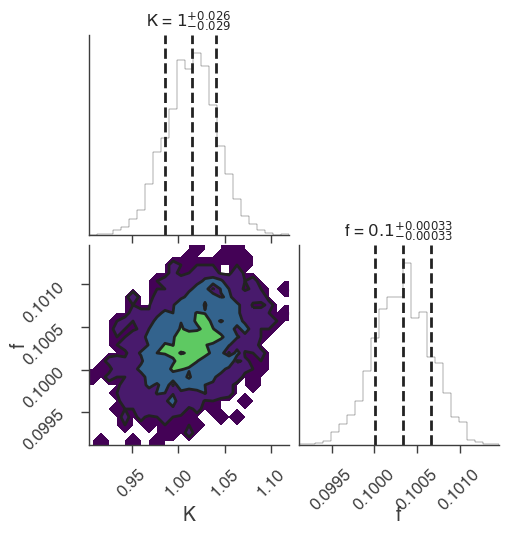

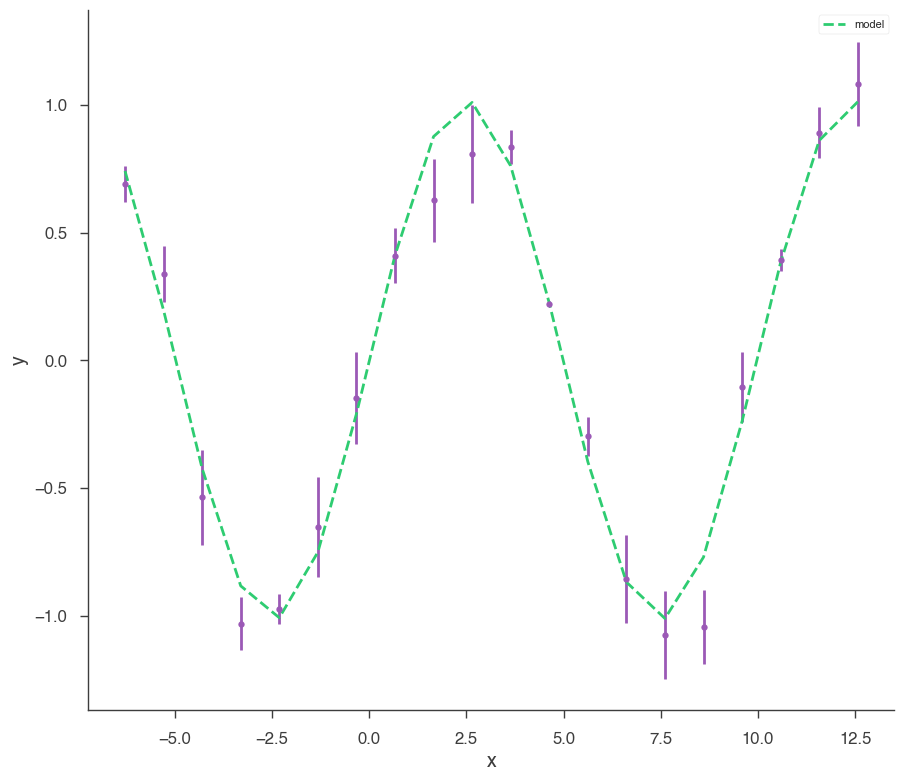

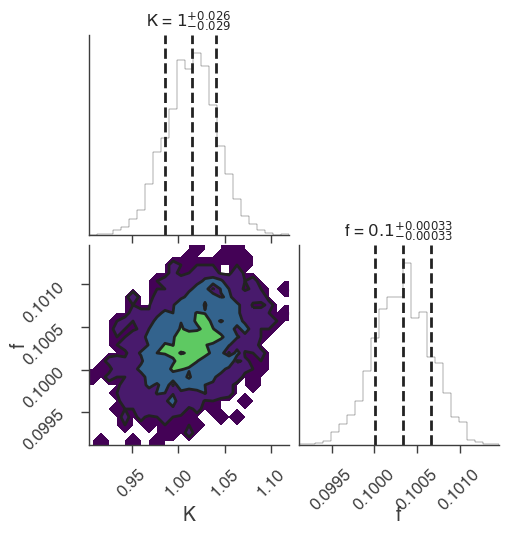

In [7]:
bayes_analysis.set_sampler("dynesty_nested")
bayes_analysis.sampler.setup(n_live_points=400)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

23:58:29 INFO      sampler set to dynesty_dynamic                                          ]8;id=472270;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=276858;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

0it [00:00, ?it/s]

27it [00:00, 269.96it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 28 | eff(%):  5.114 | loglstar:   -inf < -8549.775 <    inf | logz: -8556.737 +/-  0.118 | dlogz: 8731.904 >  0.010]

155it [00:00, 862.14it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 185 | eff(%): 22.628 | loglstar:   -inf < -3897.884 <    inf | logz: -3904.088 +/-  0.107 | dlogz: 3887.898 >  0.010]

265it [00:00, 966.70it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 360 | eff(%): 30.814 | loglstar:   -inf < -2715.592 <    inf | logz: -2723.029 +/-  0.122 | dlogz: 2717.696 >  0.010]

362it [00:00, 946.99it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 549 | eff(%): 34.509 | loglstar:   -inf < -2108.999 <    inf | logz: -2116.079 +/-  0.115 | dlogz: 2100.198 >  0.010]

457it [00:00, 913.58it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 756 | eff(%): 36.385 | loglstar:   -inf < -1683.006 <    inf | logz: -1690.088 +/-  0.116 | dlogz: 1678.248 >  0.010]

549it [00:00, 849.72it/s, batch: 0 | bound: 0 | nc: 5 | ncall: 1000 | eff(%): 36.600 | loglstar:   -inf < -1396.853 <    inf | logz: -1404.832 +/-  0.125 | dlogz: 1395.512 >  0.010]

635it [00:00, 758.88it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 1289 | eff(%): 35.495 | loglstar:   -inf < -1224.326 <    inf | logz: -1232.021 +/-  0.120 | dlogz: 1220.132 >  0.010]

713it [00:00, 702.89it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 1563 | eff(%): 34.561 | loglstar:   -inf < -1106.465 <    inf | logz: -1113.457 +/-  0.112 | dlogz: 1100.396 >  0.010]

785it [00:01, 646.34it/s, batch: 0 | bound: 0 | nc: 11 | ncall: 1844 | eff(%): 33.490 | loglstar:   -inf < -1018.323 <    inf | logz: -1026.692 +/-  0.126 | dlogz: 1015.440 >  0.010]

851it [00:01, 628.54it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 2075 | eff(%): 33.049 | loglstar:   -inf < -966.732 <    inf | logz: -974.535 +/-  0.119 | dlogz: 961.579 >  0.010]    

915it [00:01, 525.53it/s, batch: 0 | bound: 0 | nc: 5 | ncall: 2461 | eff(%): 30.902 | loglstar:   -inf < -902.039 <    inf | logz: -908.847 +/-  0.112 | dlogz: 895.098 >  0.010]

971it [00:01, 478.10it/s, batch: 0 | bound: 0 | nc: 5 | ncall: 2790 | eff(%): 29.514 | loglstar:   -inf < -866.212 <    inf | logz: -873.370 +/-  0.115 | dlogz: 859.618 >  0.010]

1021it [00:01, 425.93it/s, batch: 0 | bound: 0 | nc: 13 | ncall: 3145 | eff(%): 28.011 | loglstar:   -inf < -827.806 <    inf | logz: -834.893 +/-  0.113 | dlogz: 820.950 >  0.010]

1066it [00:01, 378.09it/s, batch: 0 | bound: 0 | nc: 8 | ncall: 3512 | eff(%): 26.570 | loglstar:   -inf < -780.402 <    inf | logz: -787.818 +/-  0.117 | dlogz: 773.895 >  0.010] 

1106it [00:01, 350.19it/s, batch: 0 | bound: 0 | nc: 5 | ncall: 3858 | eff(%): 25.379 | loglstar:   -inf < -749.520 <    inf | logz: -757.143 +/-  0.120 | dlogz: 743.259 >  0.010]

1142it [00:02, 299.67it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 4284 | eff(%): 23.871 | loglstar:   -inf < -722.020 <    inf | logz: -730.492 +/-  0.124 | dlogz: 717.034 >  0.010]

1174it [00:02, 271.72it/s, batch: 0 | bound: 0 | nc: 8 | ncall: 4643 | eff(%): 22.827 | loglstar:   -inf < -704.637 <    inf | logz: -712.243 +/-  0.114 | dlogz: 697.972 >  0.010]

1208it [00:02, 283.73it/s, batch: 0 | bound: 0 | nc: 12 | ncall: 4876 | eff(%): 22.470 | loglstar:   -inf < -675.448 <    inf | logz: -682.848 +/-  0.120 | dlogz: 670.853 >  0.010]

1238it [00:02, 281.23it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 5131 | eff(%): 21.985 | loglstar:   -inf < -650.817 <    inf | logz: -658.279 +/-  0.118 | dlogz: 646.227 >  0.010] 

1267it [00:02, 243.48it/s, batch: 0 | bound: 0 | nc: 5 | ncall: 5534 | eff(%): 20.998 | loglstar:   -inf < -631.827 <    inf | logz: -640.026 +/-  0.119 | dlogz: 628.112 >  0.010]

1293it [00:02, 237.92it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 5804 | eff(%): 20.511 | loglstar:   -inf < -615.905 <    inf | logz: -623.965 +/-  0.121 | dlogz: 613.124 >  0.010]

1318it [00:02, 214.84it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 6158 | eff(%): 19.796 | loglstar:   -inf < -596.395 <    inf | logz: -604.628 +/-  0.124 | dlogz: 593.812 >  0.010]

1341it [00:03, 197.99it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 6496 | eff(%): 19.168 | loglstar:   -inf < -576.746 <    inf | logz: -585.021 +/-  0.121 | dlogz: 574.065 >  0.010]

1362it [00:03, 172.53it/s, batch: 0 | bound: 0 | nc: 70 | ncall: 6904 | eff(%): 18.395 | loglstar:   -inf < -554.774 <    inf | logz: -564.033 +/-  0.131 | dlogz: 554.069 >  0.010]

1380it [00:03, 173.41it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 7140 | eff(%): 18.063 | loglstar:   -inf < -546.251 <    inf | logz: -554.297 +/-  0.119 | dlogz: 543.059 >  0.010] 

1398it [00:03, 171.89it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 7394 | eff(%): 17.710 | loglstar:   -inf < -535.334 <    inf | logz: -543.246 +/-  0.121 | dlogz: 531.963 >  0.010]

1416it [00:03, 167.37it/s, batch: 0 | bound: 0 | nc: 13 | ncall: 7667 | eff(%): 17.338 | loglstar:   -inf < -522.213 <    inf | logz: -529.920 +/-  0.119 | dlogz: 518.472 >  0.010]

1433it [00:03, 158.88it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 7959 | eff(%): 16.941 | loglstar:   -inf < -515.323 <    inf | logz: -523.352 +/-  0.121 | dlogz: 512.041 >  0.010] 

1450it [00:03, 157.90it/s, batch: 0 | bound: 0 | nc: 24 | ncall: 8217 | eff(%): 16.634 | loglstar:   -inf < -506.863 <    inf | logz: -514.806 +/-  0.122 | dlogz: 503.408 >  0.010]

1466it [00:03, 151.24it/s, batch: 0 | bound: 0 | nc: 19 | ncall: 8496 | eff(%): 16.296 | loglstar:   -inf < -499.453 <    inf | logz: -508.144 +/-  0.125 | dlogz: 497.392 >  0.010]

1484it [00:04, 158.73it/s, batch: 0 | bound: 0 | nc: 11 | ncall: 8737 | eff(%): 16.066 | loglstar:   -inf < -493.811 <    inf | logz: -501.439 +/-  0.118 | dlogz: 490.172 >  0.010]

1501it [00:04, 137.80it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 9131 | eff(%): 15.585 | loglstar:   -inf < -488.371 <    inf | logz: -496.368 +/-  0.117 | dlogz: 485.155 >  0.010] 

1516it [00:04, 118.25it/s, batch: 0 | bound: 0 | nc: 21 | ncall: 9557 | eff(%): 15.074 | loglstar:   -inf < -484.538 <    inf | logz: -492.226 +/-  0.119 | dlogz: 480.901 >  0.010]

1529it [00:04, 120.25it/s, batch: 0 | bound: 0 | nc: 62 | ncall: 9807 | eff(%): 14.835 | loglstar:   -inf < -482.582 <    inf | logz: -489.890 +/-  0.115 | dlogz: 478.467 >  0.010]

1548it [00:04, 133.04it/s, batch: 0 | bound: 0 | nc: 35 | ncall: 10085 | eff(%): 14.624 | loglstar:   -inf < -480.635 <    inf | logz: -487.733 +/-  0.111 | dlogz: 476.235 >  0.010]

1562it [00:04, 131.70it/s, batch: 0 | bound: 0 | nc: 20 | ncall: 10349 | eff(%): 14.398 | loglstar:   -inf < -479.926 <    inf | logz: -486.544 +/-  0.109 | dlogz: 474.970 >  0.010]

1576it [00:04, 123.54it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 10671 | eff(%): 14.108 | loglstar:   -inf < -474.798 <    inf | logz: -483.460 +/-  0.124 | dlogz: 472.361 >  0.010] 

1589it [00:04, 118.47it/s, batch: 0 | bound: 0 | nc: 16 | ncall: 10966 | eff(%): 13.858 | loglstar:   -inf < -462.528 <    inf | logz: -470.822 +/-  0.125 | dlogz: 459.485 >  0.010]

1602it [00:05, 121.44it/s, batch: 0 | bound: 0 | nc: 73 | ncall: 11206 | eff(%): 13.685 | loglstar:   -inf < -448.578 <    inf | logz: -458.669 +/-  0.141 | dlogz: 451.363 >  0.010]

1615it [00:05, 109.57it/s, batch: 0 | bound: 0 | nc: 24 | ncall: 11571 | eff(%): 13.379 | loglstar:   -inf < -426.885 <    inf | logz: -436.867 +/-  0.138 | dlogz: 427.426 >  0.010]

1627it [00:05, 107.00it/s, batch: 0 | bound: 0 | nc: 14 | ncall: 11863 | eff(%): 13.160 | loglstar:   -inf < -410.448 <    inf | logz: -419.928 +/-  0.130 | dlogz: 409.117 >  0.010]

1638it [00:05, 89.24it/s, batch: 0 | bound: 0 | nc: 22 | ncall: 12308 | eff(%): 12.789 | loglstar:   -inf < -397.237 <    inf | logz: -406.488 +/-  0.131 | dlogz: 395.691 >  0.010] 

1648it [00:05, 84.19it/s, batch: 0 | bound: 0 | nc: 45 | ncall: 12649 | eff(%): 12.533 | loglstar:   -inf < -381.908 <    inf | logz: -391.116 +/-  0.128 | dlogz: 379.996 >  0.010]

1660it [00:05, 89.16it/s, batch: 0 | bound: 0 | nc: 53 | ncall: 12929 | eff(%): 12.361 | loglstar:   -inf < -371.462 <    inf | logz: -380.201 +/-  0.129 | dlogz: 368.890 >  0.010]

1673it [00:05, 97.37it/s, batch: 0 | bound: 0 | nc: 34 | ncall: 13191 | eff(%): 12.220 | loglstar:   -inf < -356.909 <    inf | logz: -365.875 +/-  0.131 | dlogz: 354.761 >  0.010]

1684it [00:05, 90.66it/s, batch: 0 | bound: 0 | nc: 8 | ncall: 13533 | eff(%): 12.000 | loglstar:   -inf < -350.203 <    inf | logz: -359.231 +/-  0.126 | dlogz: 347.923 >  0.010] 

1695it [00:06, 94.97it/s, batch: 0 | bound: 0 | nc: 40 | ncall: 13782 | eff(%): 11.868 | loglstar:   -inf < -335.947 <    inf | logz: -345.169 +/-  0.128 | dlogz: 333.920 >  0.010]

1707it [00:06, 96.83it/s, batch: 0 | bound: 0 | nc: 104 | ncall: 14065 | eff(%): 11.720 | loglstar:   -inf < -324.722 <    inf | logz: -333.942 +/-  0.128 | dlogz: 322.654 >  0.010]

1717it [00:06, 78.28it/s, batch: 0 | bound: 0 | nc: 34 | ncall: 14550 | eff(%): 11.409 | loglstar:   -inf < -311.313 <    inf | logz: -320.593 +/-  0.131 | dlogz: 309.375 >  0.010] 

1727it [00:06, 82.38it/s, batch: 0 | bound: 0 | nc: 36 | ncall: 14805 | eff(%): 11.284 | loglstar:   -inf < -304.156 <    inf | logz: -313.443 +/-  0.128 | dlogz: 302.063 >  0.010]

1736it [00:06, 73.20it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 15203 | eff(%): 11.055 | loglstar:   -inf < -294.908 <    inf | logz: -304.913 +/-  0.136 | dlogz: 294.520 >  0.010] 

1746it [00:06, 78.82it/s, batch: 0 | bound: 0 | nc: 24 | ncall: 15457 | eff(%): 10.942 | loglstar:   -inf < -287.061 <    inf | logz: -295.874 +/-  0.128 | dlogz: 284.323 >  0.010]

1761it [00:06, 96.04it/s, batch: 0 | bound: 0 | nc: 21 | ncall: 15701 | eff(%): 10.870 | loglstar:   -inf < -277.829 <    inf | logz: -287.082 +/-  0.128 | dlogz: 275.707 >  0.010]

1775it [00:06, 106.10it/s, batch: 0 | bound: 0 | nc: 15 | ncall: 15953 | eff(%): 10.788 | loglstar:   -inf < -268.255 <    inf | logz: -277.126 +/-  0.129 | dlogz: 265.548 >  0.010]

1787it [00:07, 76.17it/s, batch: 0 | bound: 0 | nc: 8 | ncall: 16603 | eff(%): 10.448 | loglstar:   -inf < -261.443 <    inf | logz: -270.571 +/-  0.126 | dlogz: 258.941 >  0.010]  

1797it [00:07, 77.24it/s, batch: 0 | bound: 0 | nc: 48 | ncall: 16909 | eff(%): 10.322 | loglstar:   -inf < -254.956 <    inf | logz: -264.250 +/-  0.130 | dlogz: 252.853 >  0.010]

1807it [00:07, 78.15it/s, batch: 0 | bound: 0 | nc: 75 | ncall: 17212 | eff(%): 10.202 | loglstar:   -inf < -252.375 <    inf | logz: -260.880 +/-  0.124 | dlogz: 249.061 >  0.010]

1816it [00:07, 73.08it/s, batch: 0 | bound: 0 | nc: 20 | ncall: 17574 | eff(%): 10.048 | loglstar:   -inf < -249.924 <    inf | logz: -258.328 +/-  0.124 | dlogz: 246.446 >  0.010]

1826it [00:07, 53.21it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 17754 | eff(%): 10.003 | loglstar:   -inf < -242.119 <    inf | logz: -251.836 +/-  0.132 | dlogz: 240.463 >  0.010] 

1928it [00:08, 227.98it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 17902 | eff(%): 10.477 | loglstar:   -inf < -193.758 <    inf | logz: -202.768 +/-  0.126 | dlogz: 190.805 >  0.010]

2026it [00:08, 382.07it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 18056 | eff(%): 10.918 | loglstar:   -inf < -162.529 <    inf | logz: -171.121 +/-  0.124 | dlogz: 158.803 >  0.010]

2110it [00:08, 485.23it/s, batch: 0 | bound: 1 | nc: 2 | ncall: 18221 | eff(%): 11.271 | loglstar:   -inf < -141.877 <    inf | logz: -150.585 +/-  0.126 | dlogz: 138.087 >  0.010]

2178it [00:08, 530.39it/s, batch: 0 | bound: 1 | nc: 6 | ncall: 18397 | eff(%): 11.526 | loglstar:   -inf < -125.612 <    inf | logz: -134.450 +/-  0.126 | dlogz: 121.819 >  0.010]

2242it [00:08, 363.68it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 18540 | eff(%): 11.775 | loglstar:   -inf < -110.596 <    inf | logz: -120.683 +/-  0.128 | dlogz: 108.116 >  0.010]

2351it [00:08, 503.71it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 18691 | eff(%): 12.251 | loglstar:   -inf < -91.249 <    inf | logz: -100.016 +/-  0.126 | dlogz: 86.968 >  0.010]  

2450it [00:08, 607.79it/s, batch: 0 | bound: 2 | nc: 2 | ncall: 18849 | eff(%): 12.662 | loglstar:   -inf < -77.322 <    inf | logz: -86.019 +/-  0.126 | dlogz: 72.735 >  0.010] 

2531it [00:08, 654.61it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 19016 | eff(%): 12.969 | loglstar:   -inf < -66.775 <    inf | logz: -75.873 +/-  0.129 | dlogz: 62.463 >  0.010]

2614it [00:09, 696.81it/s, batch: 0 | bound: 2 | nc: 2 | ncall: 19186 | eff(%): 13.278 | loglstar:   -inf < -58.379 <    inf | logz: -67.634 +/-  0.126 | dlogz: 54.038 >  0.010]

2694it [00:09, 470.65it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 19319 | eff(%): 13.593 | loglstar:   -inf < -52.022 <    inf | logz: -60.973 +/-  0.128 | dlogz: 47.190 >  0.010]

2795it [00:09, 576.51it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 19470 | eff(%): 13.996 | loglstar:   -inf < -45.049 <    inf | logz: -53.939 +/-  0.127 | dlogz: 39.937 >  0.010]

2893it [00:09, 664.93it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 19627 | eff(%): 14.374 | loglstar:   -inf < -39.354 <    inf | logz: -48.509 +/-  0.127 | dlogz: 34.315 >  0.010]

2977it [00:09, 706.06it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 19794 | eff(%): 14.669 | loglstar:   -inf < -35.499 <    inf | logz: -44.498 +/-  0.126 | dlogz: 30.117 >  0.010]

3060it [00:09, 733.55it/s, batch: 0 | bound: 3 | nc: 2 | ncall: 19962 | eff(%): 14.955 | loglstar:   -inf < -31.465 <    inf | logz: -40.734 +/-  0.129 | dlogz: 26.195 >  0.010]

3142it [00:10, 512.41it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 20082 | eff(%): 15.266 | loglstar:   -inf < -27.817 <    inf | logz: -37.123 +/-  0.129 | dlogz: 22.413 >  0.010]

3247it [00:10, 622.18it/s, batch: 0 | bound: 4 | nc: 2 | ncall: 20232 | eff(%): 15.662 | loglstar:   -inf < -24.472 <    inf | logz: -33.520 +/-  0.128 | dlogz: 18.585 >  0.010]

3339it [00:10, 689.39it/s, batch: 0 | bound: 4 | nc: 3 | ncall: 20391 | eff(%): 15.983 | loglstar:   -inf < -21.630 <    inf | logz: -31.069 +/-  0.128 | dlogz: 15.976 >  0.010]

3425it [00:10, 730.05it/s, batch: 0 | bound: 4 | nc: 2 | ncall: 20554 | eff(%): 16.268 | loglstar:   -inf < -19.705 <    inf | logz: -28.881 +/-  0.128 | dlogz: 13.605 >  0.010]

3509it [00:10, 740.45it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 20739 | eff(%): 16.521 | loglstar:   -inf < -17.879 <    inf | logz: -27.212 +/-  0.128 | dlogz: 11.768 >  0.010]

3591it [00:10, 505.08it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 20845 | eff(%): 16.824 | loglstar:   -inf < -16.463 <    inf | logz: -25.734 +/-  0.129 | dlogz: 10.122 >  0.010]

3706it [00:10, 632.90it/s, batch: 0 | bound: 5 | nc: 3 | ncall: 20995 | eff(%): 17.241 | loglstar:   -inf < -14.789 <    inf | logz: -24.056 +/-  0.129 | dlogz:  8.211 >  0.010]

3806it [00:10, 714.40it/s, batch: 0 | bound: 5 | nc: 3 | ncall: 21149 | eff(%): 17.580 | loglstar:   -inf < -13.478 <    inf | logz: -22.852 +/-  0.129 | dlogz:  6.807 >  0.010]

3892it [00:11, 726.35it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 21343 | eff(%): 17.818 | loglstar:   -inf < -12.782 <    inf | logz: -22.020 +/-  0.129 | dlogz:  5.802 >  0.010]

3975it [00:11, 478.97it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 21518 | eff(%): 18.053 | loglstar:   -inf < -12.036 <    inf | logz: -21.323 +/-  0.129 | dlogz:  4.951 >  0.010]

4092it [00:11, 606.40it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 21661 | eff(%): 18.465 | loglstar:   -inf < -11.311 <    inf | logz: -20.546 +/-  0.129 | dlogz:  3.953 >  0.010]

4197it [00:11, 698.16it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 21814 | eff(%): 18.809 | loglstar:   -inf < -10.646 <    inf | logz: -19.971 +/-  0.129 | dlogz:  3.191 >  0.010]

4285it [00:11, 735.28it/s, batch: 0 | bound: 6 | nc: 3 | ncall: 21983 | eff(%): 19.059 | loglstar:   -inf < -10.294 <    inf | logz: -19.567 +/-  0.129 | dlogz:  2.648 >  0.010]

4373it [00:11, 748.66it/s, batch: 0 | bound: 6 | nc: 2 | ncall: 22175 | eff(%): 19.286 | loglstar:   -inf < -10.033 <    inf | logz: -19.246 +/-  0.129 | dlogz:  2.195 >  0.010]

4458it [00:12, 498.79it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 22331 | eff(%): 19.526 | loglstar:   -inf < -9.819 <    inf | logz: -19.000 +/-  0.128 | dlogz:  1.842 >  0.010] 

4563it [00:12, 602.47it/s, batch: 0 | bound: 7 | nc: 5 | ncall: 22482 | eff(%): 19.855 | loglstar:   -inf < -9.569 <    inf | logz: -18.753 +/-  0.128 | dlogz:  1.473 >  0.010]

4655it [00:12, 669.53it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 22641 | eff(%): 20.116 | loglstar:   -inf < -9.355 <    inf | logz: -18.570 +/-  0.128 | dlogz:  1.205 >  0.010]

4738it [00:12, 702.59it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 22811 | eff(%): 20.325 | loglstar:   -inf < -9.213 <    inf | logz: -18.430 +/-  0.128 | dlogz:  1.001 >  0.010]

4820it [00:12, 705.90it/s, batch: 0 | bound: 7 | nc: 2 | ncall: 23007 | eff(%): 20.505 | loglstar:   -inf < -9.100 <    inf | logz: -18.313 +/-  0.128 | dlogz:  0.833 >  0.010]

4899it [00:12, 513.22it/s, batch: 0 | bound: 8 | nc: 2 | ncall: 23106 | eff(%): 20.753 | loglstar:   -inf < -8.993 <    inf | logz: -18.216 +/-  0.128 | dlogz:  0.697 >  0.010]

5009it [00:12, 633.15it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 23254 | eff(%): 21.087 | loglstar:   -inf < -8.875 <    inf | logz: -18.103 +/-  0.128 | dlogz:  0.544 >  0.010]

5110it [00:13, 716.37it/s, batch: 0 | bound: 8 | nc: 3 | ncall: 23407 | eff(%): 21.374 | loglstar:   -inf < -8.790 <    inf | logz: -18.019 +/-  0.128 | dlogz:  0.434 >  0.010]

5195it [00:13, 746.07it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 23574 | eff(%): 21.579 | loglstar:   -inf < -8.732 <    inf | logz: -17.961 +/-  0.128 | dlogz:  0.359 >  0.010]

5280it [00:13, 467.07it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 23781 | eff(%): 21.745 | loglstar:   -inf < -8.684 <    inf | logz: -17.912 +/-  0.128 | dlogz:  0.298 >  0.010]

5399it [00:13, 597.61it/s, batch: 0 | bound: 9 | nc: 2 | ncall: 23928 | eff(%): 22.102 | loglstar:   -inf < -8.626 <    inf | logz: -17.855 +/-  0.128 | dlogz:  0.230 >  0.010]

5502it [00:13, 686.40it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 24082 | eff(%): 22.382 | loglstar:   -inf < -8.583 <    inf | logz: -17.816 +/-  0.128 | dlogz:  0.184 >  0.010]

5591it [00:13, 721.03it/s, batch: 0 | bound: 9 | nc: 3 | ncall: 24264 | eff(%): 22.577 | loglstar:   -inf < -8.554 <    inf | logz: -17.788 +/-  0.128 | dlogz:  0.152 >  0.010]

5678it [00:13, 745.08it/s, batch: 0 | bound: 9 | nc: 2 | ncall: 24444 | eff(%): 22.763 | loglstar:   -inf < -8.532 <    inf | logz: -17.765 +/-  0.128 | dlogz:  0.127 >  0.010]

5764it [00:14, 488.87it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 24593 | eff(%): 22.971 | loglstar:   -inf < -8.516 <    inf | logz: -17.746 +/-  0.128 | dlogz:  0.106 >  0.010]

5877it [00:14, 608.16it/s, batch: 0 | bound: 10 | nc: 2 | ncall: 24739 | eff(%): 23.285 | loglstar:   -inf < -8.496 <    inf | logz: -17.725 +/-  0.128 | dlogz:  0.084 >  0.010]

5968it [00:14, 671.49it/s, batch: 0 | bound: 10 | nc: 3 | ncall: 24888 | eff(%): 23.507 | loglstar:   -inf < -8.484 <    inf | logz: -17.712 +/-  0.128 | dlogz:  0.069 >  0.010]

6052it [00:14, 700.27it/s, batch: 0 | bound: 10 | nc: 2 | ncall: 25064 | eff(%): 23.674 | loglstar:   -inf < -8.474 <    inf | logz: -17.702 +/-  0.128 | dlogz:  0.058 >  0.010]

6135it [00:14, 713.78it/s, batch: 0 | bound: 10 | nc: 2 | ncall: 25256 | eff(%): 23.820 | loglstar:   -inf < -8.466 <    inf | logz: -17.693 +/-  0.128 | dlogz:  0.049 >  0.010]

6216it [00:14, 483.82it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 25365 | eff(%): 24.032 | loglstar:   -inf < -8.459 <    inf | logz: -17.686 +/-  0.128 | dlogz:  0.042 >  0.010]

6324it [00:15, 598.27it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 25519 | eff(%): 24.305 | loglstar:   -inf < -8.451 <    inf | logz: -17.678 +/-  0.128 | dlogz:  0.034 >  0.010]

6409it [00:15, 652.43it/s, batch: 0 | bound: 11 | nc: 3 | ncall: 25683 | eff(%): 24.478 | loglstar:   -inf < -8.447 <    inf | logz: -17.672 +/-  0.128 | dlogz:  0.028 >  0.010]

6490it [00:15, 687.88it/s, batch: 0 | bound: 11 | nc: 2 | ncall: 25851 | eff(%): 24.629 | loglstar:   -inf < -8.443 <    inf | logz: -17.668 +/-  0.128 | dlogz:  0.024 >  0.010]

6570it [00:15, 468.99it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 26036 | eff(%): 24.759 | loglstar:   -inf < -8.440 <    inf | logz: -17.665 +/-  0.128 | dlogz:  0.020 >  0.010]

6688it [00:15, 603.56it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 26178 | eff(%): 25.069 | loglstar:   -inf < -8.436 <    inf | logz: -17.661 +/-  0.128 | dlogz:  0.016 >  0.010]

6801it [00:15, 715.10it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 26327 | eff(%): 25.351 | loglstar:   -inf < -8.434 <    inf | logz: -17.657 +/-  0.128 | dlogz:  0.013 >  0.010]

6896it [00:15, 769.76it/s, batch: 0 | bound: 12 | nc: 2 | ncall: 26485 | eff(%): 25.555 | loglstar:   -inf < -8.432 <    inf | logz: -17.655 +/-  0.128 | dlogz:  0.011 >  0.010]

7221it [00:15, 1389.81it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 26844 | eff(%): 26.699 | loglstar:   -inf < -8.427 <    inf | logz: -17.649 +/-  0.128 | dlogz:  0.004 >  0.010]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



7423it [00:16, 616.14it/s, batch: 1 | bound: 0 | nc: 1 | ncall: 27046 | eff(%): 27.446 | loglstar: -10.415 < -9.119 < -8.891 | logz: -17.645 +/-  0.132 | stop:  1.441]           

7545it [00:17, 414.80it/s, batch: 1 | bound: 2 | nc: 3 | ncall: 27200 | eff(%): 27.209 | loglstar: -10.415 < -9.995 < -8.891 | logz: -17.645 +/-  0.132 | stop:  1.441]

7637it [00:17, 451.81it/s, batch: 1 | bound: 2 | nc: 2 | ncall: 27346 | eff(%): 27.396 | loglstar: -10.415 < -9.714 < -8.891 | logz: -17.645 +/-  0.132 | stop:  1.441]

7723it [00:17, 485.13it/s, batch: 1 | bound: 2 | nc: 3 | ncall: 27510 | eff(%): 27.543 | loglstar: -10.415 < -9.517 < -8.891 | logz: -17.645 +/-  0.132 | stop:  1.441]

7803it [00:17, 512.63it/s, batch: 1 | bound: 2 | nc: 1 | ncall: 27671 | eff(%): 27.669 | loglstar: -10.415 < -9.349 < -8.891 | logz: -17.645 +/-  0.132 | stop:  1.441]

7879it [00:17, 386.74it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 27839 | eff(%): 27.773 | loglstar: -10.415 < -9.196 < -8.891 | logz: -17.645 +/-  0.132 | stop:  1.441]

7958it [00:18, 443.66it/s, batch: 1 | bound: 3 | nc: 2 | ncall: 27936 | eff(%): 27.956 | loglstar: -10.415 < -9.090 < -8.891 | logz: -17.645 +/-  0.132 | stop:  1.441]

8034it [00:18, 496.66it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 28045 | eff(%): 28.115 | loglstar: -10.415 < -9.002 < -8.891 | logz: -17.645 +/-  0.132 | stop:  1.441]

8107it [00:18, 540.99it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 28159 | eff(%): 28.258 | loglstar: -10.415 < -8.921 < -8.891 | logz: -17.645 +/-  0.132 | stop:  1.441]

8487it [00:18, 1246.65it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 28576 | eff(%): 29.542 | loglstar: -10.415 < -8.560 < -8.891 | logz: -17.645 +/-  0.132 | stop:  1.441]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



8650it [00:19, 357.46it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 28751 | eff(%): 29.522 | loglstar: -10.837 < -10.719 < -10.413 | logz: -17.628 +/-  0.107 | stop:  1.082]

8819it [00:19, 467.69it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 28950 | eff(%): 30.019 | loglstar: -10.837 < -9.981 < -10.413 | logz: -17.628 +/-  0.107 | stop:  1.082] 


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



9211it [00:20, 514.13it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 29378 | eff(%): 31.353 | loglstar: -10.837 < -8.424 < -10.413 | logz: -17.628 +/-  0.107 | stop:  0.923]

9211it [00:20, 450.54it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 29378 | eff(%): 31.353 | loglstar: -10.837 < -8.424 < -10.413 | logz: -17.628 +/-  0.107 | stop:  0.923]

23:58:51 INFO      fit restored to maximum of posterior                                         ]8;id=417375;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=310262;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=313855;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=672787;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.014 -0.028 +0.027,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.0031 -0.0032 +0.0033) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-8.437591
total,-8.437591


Values of statistical measures:

,statistical measures
AIC,21.581064
BIC,22.866647
DIC,20.762850
PDIC,1.943681
log(Z),-7.654014


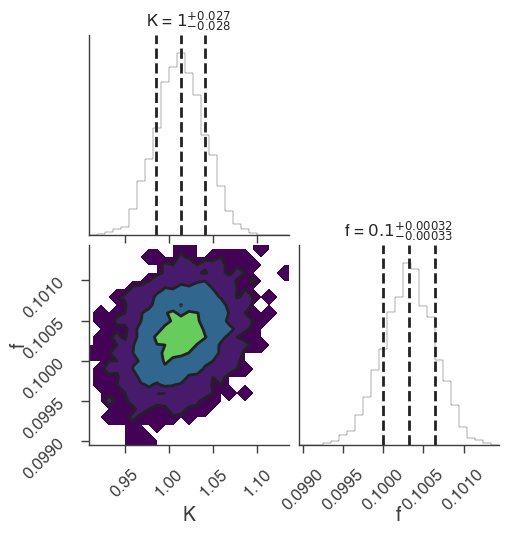

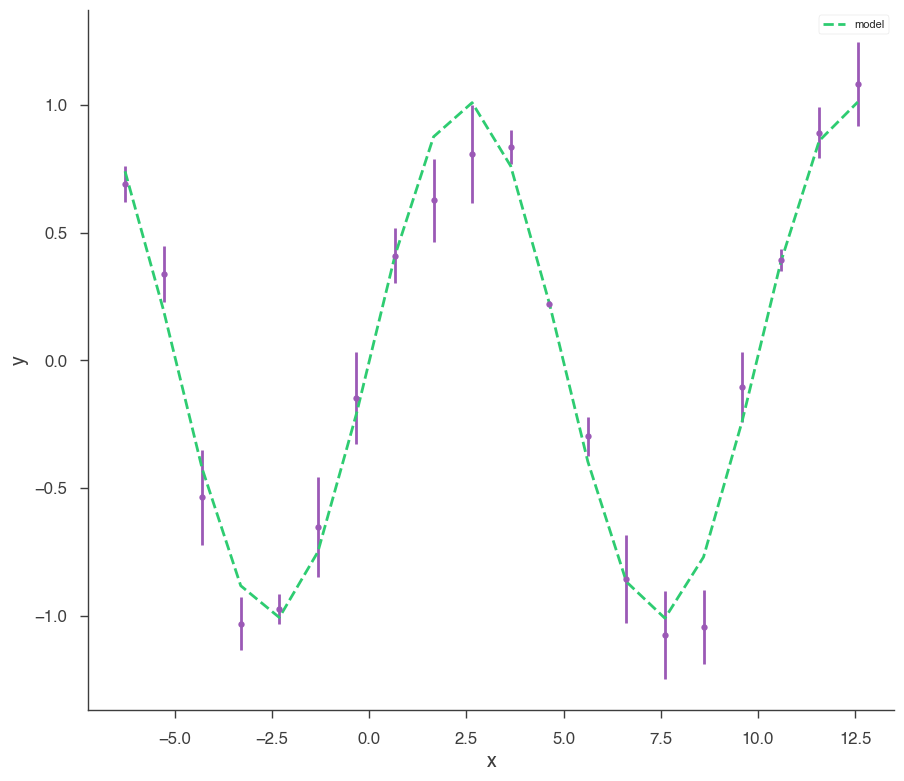

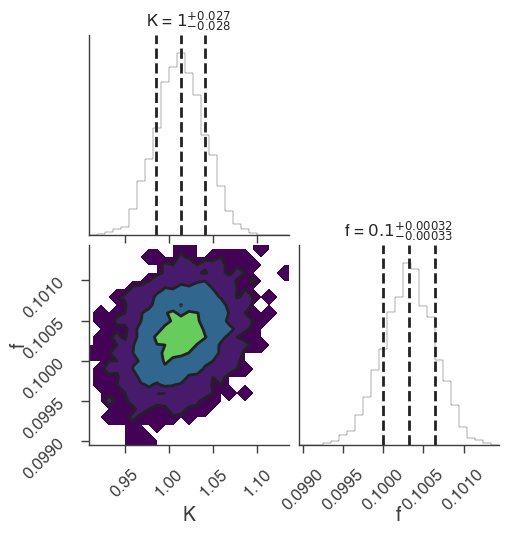

In [8]:
bayes_analysis.set_sampler("dynesty_dynamic")
bayes_analysis.sampler.setup(
    stop_function=dynesty.utils.old_stopping_function, n_effective=None
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## zeus

         INFO      sampler set to zeus                                                     ]8;id=298355;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=806710;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

The run method has been deprecated and it will be removed. Please use the new run_mcmc method.


Initialising ensemble of 20 walkers...


Sampling progress :   0%|          | 0/625 [00:00<?, ?it/s]

Sampling progress :   1%|          | 4/625 [00:00<00:16, 38.52it/s]

Sampling progress :   1%|▏         | 8/625 [00:00<00:19, 30.91it/s]

Sampling progress :   2%|▏         | 12/625 [00:00<00:21, 28.55it/s]

Sampling progress :   2%|▏         | 15/625 [00:00<00:23, 26.10it/s]

Sampling progress :   3%|▎         | 19/625 [00:00<00:21, 28.77it/s]

Sampling progress :   4%|▎         | 23/625 [00:00<00:19, 30.76it/s]

Sampling progress :   4%|▍         | 27/625 [00:00<00:18, 32.47it/s]

Sampling progress :   5%|▍         | 31/625 [00:00<00:17, 33.73it/s]

Sampling progress :   6%|▌         | 35/625 [00:01<00:17, 33.56it/s]

Sampling progress :   6%|▌         | 39/625 [00:01<00:16, 35.29it/s]

Sampling progress :   7%|▋         | 44/625 [00:01<00:15, 38.45it/s]

Sampling progress :   8%|▊         | 48/625 [00:01<00:15, 38.03it/s]

Sampling progress :   8%|▊         | 52/625 [00:01<00:15, 36.69it/s]

Sampling progress :   9%|▉         | 56/625 [00:01<00:15, 37.38it/s]

Sampling progress :  10%|▉         | 60/625 [00:01<00:15, 37.40it/s]

Sampling progress :  10%|█         | 64/625 [00:01<00:15, 37.12it/s]

Sampling progress :  11%|█         | 69/625 [00:01<00:14, 38.17it/s]

Sampling progress :  12%|█▏        | 73/625 [00:02<00:14, 38.67it/s]

Sampling progress :  12%|█▏        | 77/625 [00:02<00:14, 38.25it/s]

Sampling progress :  13%|█▎        | 81/625 [00:02<00:14, 37.40it/s]

Sampling progress :  14%|█▎        | 85/625 [00:02<00:14, 37.53it/s]

Sampling progress :  14%|█▍        | 89/625 [00:02<00:14, 35.97it/s]

Sampling progress :  15%|█▍        | 93/625 [00:02<00:14, 36.45it/s]

Sampling progress :  16%|█▌        | 97/625 [00:02<00:14, 36.71it/s]

Sampling progress :  16%|█▌        | 101/625 [00:02<00:15, 34.82it/s]

Sampling progress :  17%|█▋        | 105/625 [00:03<00:15, 34.07it/s]

Sampling progress :  17%|█▋        | 109/625 [00:03<00:14, 35.48it/s]

Sampling progress :  18%|█▊        | 113/625 [00:03<00:14, 35.94it/s]

Sampling progress :  19%|█▊        | 117/625 [00:03<00:13, 36.79it/s]

Sampling progress :  19%|█▉        | 121/625 [00:03<00:13, 36.44it/s]

Sampling progress :  20%|██        | 126/625 [00:03<00:13, 38.05it/s]

Sampling progress :  21%|██        | 130/625 [00:03<00:13, 37.84it/s]

Sampling progress :  21%|██▏       | 134/625 [00:03<00:12, 38.23it/s]

Sampling progress :  22%|██▏       | 138/625 [00:03<00:12, 38.57it/s]

Sampling progress :  23%|██▎       | 142/625 [00:03<00:12, 38.34it/s]

Sampling progress :  23%|██▎       | 146/625 [00:04<00:12, 36.95it/s]

Sampling progress :  24%|██▍       | 151/625 [00:04<00:12, 37.98it/s]

Sampling progress :  25%|██▍       | 155/625 [00:04<00:12, 37.97it/s]

Sampling progress :  25%|██▌       | 159/625 [00:04<00:12, 37.37it/s]

Sampling progress :  26%|██▌       | 163/625 [00:04<00:12, 37.54it/s]

Sampling progress :  27%|██▋       | 167/625 [00:04<00:12, 37.65it/s]

Sampling progress :  27%|██▋       | 171/625 [00:04<00:12, 37.26it/s]

Sampling progress :  28%|██▊       | 175/625 [00:04<00:12, 37.43it/s]

Sampling progress :  29%|██▉       | 180/625 [00:04<00:11, 38.19it/s]

Sampling progress :  30%|██▉       | 185/625 [00:05<00:11, 38.74it/s]

Sampling progress :  30%|███       | 189/625 [00:05<00:11, 38.21it/s]

Sampling progress :  31%|███       | 193/625 [00:05<00:11, 38.24it/s]

Sampling progress :  32%|███▏      | 197/625 [00:05<00:11, 38.16it/s]

Sampling progress :  32%|███▏      | 201/625 [00:05<00:11, 38.00it/s]

Sampling progress :  33%|███▎      | 205/625 [00:05<00:11, 37.67it/s]

Sampling progress :  33%|███▎      | 209/625 [00:05<00:11, 37.45it/s]

Sampling progress :  34%|███▍      | 213/625 [00:05<00:11, 36.42it/s]

Sampling progress :  35%|███▍      | 217/625 [00:05<00:11, 36.83it/s]

Sampling progress :  35%|███▌      | 221/625 [00:06<00:11, 36.66it/s]

Sampling progress :  36%|███▌      | 225/625 [00:06<00:10, 37.42it/s]

Sampling progress :  37%|███▋      | 229/625 [00:06<00:10, 36.91it/s]

Sampling progress :  37%|███▋      | 233/625 [00:06<00:10, 37.51it/s]

Sampling progress :  38%|███▊      | 238/625 [00:06<00:09, 39.59it/s]

Sampling progress :  39%|███▊      | 242/625 [00:06<00:09, 39.27it/s]

Sampling progress :  39%|███▉      | 246/625 [00:06<00:09, 39.47it/s]

Sampling progress :  40%|████      | 250/625 [00:06<00:09, 38.42it/s]

Sampling progress :  41%|████      | 254/625 [00:06<00:09, 38.09it/s]

Sampling progress :  41%|████▏     | 258/625 [00:07<00:09, 38.06it/s]

Sampling progress :  42%|████▏     | 262/625 [00:07<00:09, 37.86it/s]

Sampling progress :  43%|████▎     | 266/625 [00:07<00:09, 37.78it/s]

Sampling progress :  43%|████▎     | 270/625 [00:07<00:09, 38.38it/s]

Sampling progress :  44%|████▍     | 274/625 [00:07<00:09, 38.11it/s]

Sampling progress :  44%|████▍     | 278/625 [00:07<00:09, 37.46it/s]

Sampling progress :  45%|████▌     | 282/625 [00:07<00:10, 31.45it/s]

Sampling progress :  46%|████▌     | 287/625 [00:07<00:09, 34.12it/s]

Sampling progress :  47%|████▋     | 291/625 [00:07<00:09, 34.67it/s]

Sampling progress :  47%|████▋     | 296/625 [00:08<00:08, 37.36it/s]

Sampling progress :  48%|████▊     | 300/625 [00:08<00:08, 36.82it/s]

Sampling progress :  49%|████▊     | 304/625 [00:08<00:08, 37.05it/s]

Sampling progress :  49%|████▉     | 308/625 [00:08<00:08, 36.99it/s]

Sampling progress :  50%|████▉     | 312/625 [00:08<00:08, 37.03it/s]

Sampling progress :  51%|█████     | 316/625 [00:08<00:08, 36.28it/s]

Sampling progress :  51%|█████▏    | 321/625 [00:08<00:07, 38.81it/s]

Sampling progress :  52%|█████▏    | 325/625 [00:08<00:07, 38.51it/s]

Sampling progress :  53%|█████▎    | 329/625 [00:08<00:07, 38.30it/s]

Sampling progress :  53%|█████▎    | 334/625 [00:09<00:07, 38.57it/s]

Sampling progress :  54%|█████▍    | 338/625 [00:09<00:07, 37.90it/s]

Sampling progress :  55%|█████▍    | 342/625 [00:09<00:07, 38.25it/s]

Sampling progress :  55%|█████▌    | 346/625 [00:09<00:07, 37.38it/s]

Sampling progress :  56%|█████▌    | 350/625 [00:09<00:07, 37.60it/s]

Sampling progress :  57%|█████▋    | 354/625 [00:09<00:07, 36.42it/s]

Sampling progress :  57%|█████▋    | 358/625 [00:09<00:07, 36.53it/s]

Sampling progress :  58%|█████▊    | 362/625 [00:09<00:07, 37.20it/s]

Sampling progress :  59%|█████▊    | 366/625 [00:09<00:07, 36.78it/s]

Sampling progress :  59%|█████▉    | 370/625 [00:10<00:06, 37.26it/s]

Sampling progress :  60%|█████▉    | 374/625 [00:10<00:06, 37.70it/s]

Sampling progress :  60%|██████    | 378/625 [00:10<00:06, 37.77it/s]

Sampling progress :  61%|██████    | 382/625 [00:10<00:06, 37.45it/s]

Sampling progress :  62%|██████▏   | 387/625 [00:10<00:06, 39.64it/s]

Sampling progress :  63%|██████▎   | 391/625 [00:10<00:05, 39.29it/s]

Sampling progress :  63%|██████▎   | 395/625 [00:10<00:05, 38.47it/s]

Sampling progress :  64%|██████▍   | 400/625 [00:10<00:05, 39.06it/s]

Sampling progress :  65%|██████▍   | 404/625 [00:10<00:05, 38.51it/s]

Sampling progress :  65%|██████▌   | 408/625 [00:11<00:05, 37.98it/s]

Sampling progress :  66%|██████▌   | 412/625 [00:11<00:05, 37.87it/s]

Sampling progress :  67%|██████▋   | 416/625 [00:11<00:05, 36.65it/s]

Sampling progress :  67%|██████▋   | 420/625 [00:11<00:05, 36.47it/s]

Sampling progress :  68%|██████▊   | 424/625 [00:11<00:05, 35.53it/s]

Sampling progress :  68%|██████▊   | 428/625 [00:11<00:05, 35.89it/s]

Sampling progress :  69%|██████▉   | 432/625 [00:11<00:05, 35.91it/s]

Sampling progress :  70%|██████▉   | 436/625 [00:11<00:05, 35.54it/s]

Sampling progress :  71%|███████   | 441/625 [00:11<00:05, 36.70it/s]

Sampling progress :  71%|███████   | 445/625 [00:12<00:04, 36.82it/s]

Sampling progress :  72%|███████▏  | 449/625 [00:12<00:04, 36.42it/s]

Sampling progress :  72%|███████▏  | 453/625 [00:12<00:04, 36.23it/s]

Sampling progress :  73%|███████▎  | 458/625 [00:12<00:04, 37.55it/s]

Sampling progress :  74%|███████▍  | 462/625 [00:12<00:04, 37.21it/s]

Sampling progress :  75%|███████▍  | 466/625 [00:12<00:04, 36.75it/s]

Sampling progress :  75%|███████▌  | 470/625 [00:12<00:04, 35.97it/s]

Sampling progress :  76%|███████▌  | 474/625 [00:12<00:04, 36.27it/s]

Sampling progress :  76%|███████▋  | 478/625 [00:12<00:04, 36.47it/s]

Sampling progress :  77%|███████▋  | 482/625 [00:13<00:03, 36.53it/s]

Sampling progress :  78%|███████▊  | 486/625 [00:13<00:03, 37.21it/s]

Sampling progress :  78%|███████▊  | 490/625 [00:13<00:03, 37.28it/s]

Sampling progress :  79%|███████▉  | 494/625 [00:13<00:03, 36.89it/s]

Sampling progress :  80%|███████▉  | 498/625 [00:13<00:03, 35.95it/s]

Sampling progress :  80%|████████  | 503/625 [00:13<00:03, 38.42it/s]

Sampling progress :  81%|████████  | 507/625 [00:13<00:03, 38.46it/s]

Sampling progress :  82%|████████▏ | 511/625 [00:13<00:03, 37.18it/s]

Sampling progress :  82%|████████▏ | 515/625 [00:13<00:03, 36.55it/s]

Sampling progress :  83%|████████▎ | 519/625 [00:14<00:02, 36.75it/s]

Sampling progress :  84%|████████▍ | 524/625 [00:14<00:02, 38.91it/s]

Sampling progress :  84%|████████▍ | 528/625 [00:14<00:02, 38.10it/s]

Sampling progress :  85%|████████▌ | 532/625 [00:14<00:02, 37.35it/s]

Sampling progress :  86%|████████▌ | 536/625 [00:14<00:02, 37.42it/s]

Sampling progress :  86%|████████▋ | 540/625 [00:14<00:02, 37.29it/s]

Sampling progress :  87%|████████▋ | 544/625 [00:14<00:02, 37.90it/s]

Sampling progress :  88%|████████▊ | 548/625 [00:14<00:02, 37.13it/s]

Sampling progress :  88%|████████▊ | 552/625 [00:14<00:01, 36.90it/s]

Sampling progress :  89%|████████▉ | 556/625 [00:15<00:01, 36.64it/s]

Sampling progress :  90%|████████▉ | 560/625 [00:15<00:01, 35.61it/s]

Sampling progress :  90%|█████████ | 564/625 [00:15<00:01, 35.44it/s]

Sampling progress :  91%|█████████ | 568/625 [00:15<00:01, 36.11it/s]

Sampling progress :  92%|█████████▏| 572/625 [00:15<00:01, 35.95it/s]

Sampling progress :  92%|█████████▏| 576/625 [00:15<00:01, 36.92it/s]

Sampling progress :  93%|█████████▎| 580/625 [00:15<00:01, 37.11it/s]

Sampling progress :  93%|█████████▎| 584/625 [00:15<00:01, 36.83it/s]

Sampling progress :  94%|█████████▍| 588/625 [00:15<00:01, 36.78it/s]

Sampling progress :  95%|█████████▍| 592/625 [00:16<00:00, 36.71it/s]

Sampling progress :  96%|█████████▌| 597/625 [00:16<00:00, 37.80it/s]

Sampling progress :  96%|█████████▌| 601/625 [00:16<00:00, 37.70it/s]

Sampling progress :  97%|█████████▋| 605/625 [00:16<00:00, 37.88it/s]

Sampling progress :  97%|█████████▋| 609/625 [00:16<00:00, 37.46it/s]

Sampling progress :  98%|█████████▊| 613/625 [00:16<00:00, 36.96it/s]

Sampling progress :  99%|█████████▊| 617/625 [00:16<00:00, 36.17it/s]

Sampling progress :  99%|█████████▉| 621/625 [00:16<00:00, 34.94it/s]

Sampling progress : 100%|██████████| 625/625 [00:16<00:00, 35.41it/s]

Sampling progress : 100%|██████████| 625/625 [00:16<00:00, 36.85it/s]

23:59:09 INFO      fit restored to maximum of posterior                                         ]8;id=579586;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=458912;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=64936;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=320788;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Summary


-------


Number of Generations: 625


Number of Parameters: 2


Number of Walkers: 20


Number of Tuning Generations: 21


Scale Factor: 1.204423


Mean Integrated Autocorrelation Time: 2.86


Effective Sample Size: 4363.22


Number of Log Probability Evaluations: 65616


Effective Samples per Log Probability Evaluation: 0.066496


None


Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.014 -0.028 +0.027,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.0032 -0.0031 +0.0032) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-8.437544
total,-8.437544


Values of statistical measures:

,statistical measures
AIC,21.580970
BIC,22.866552
DIC,20.769239
PDIC,1.947017


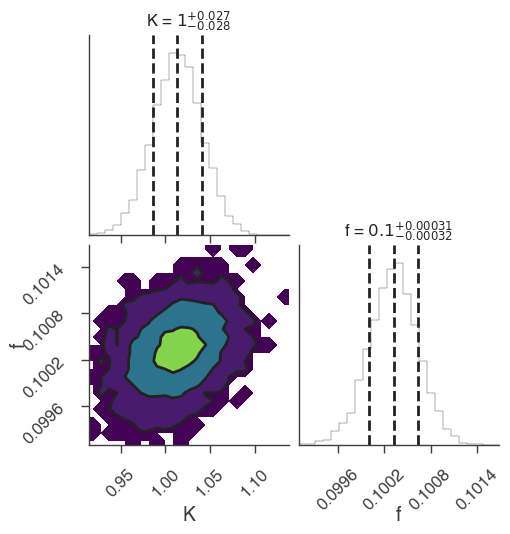

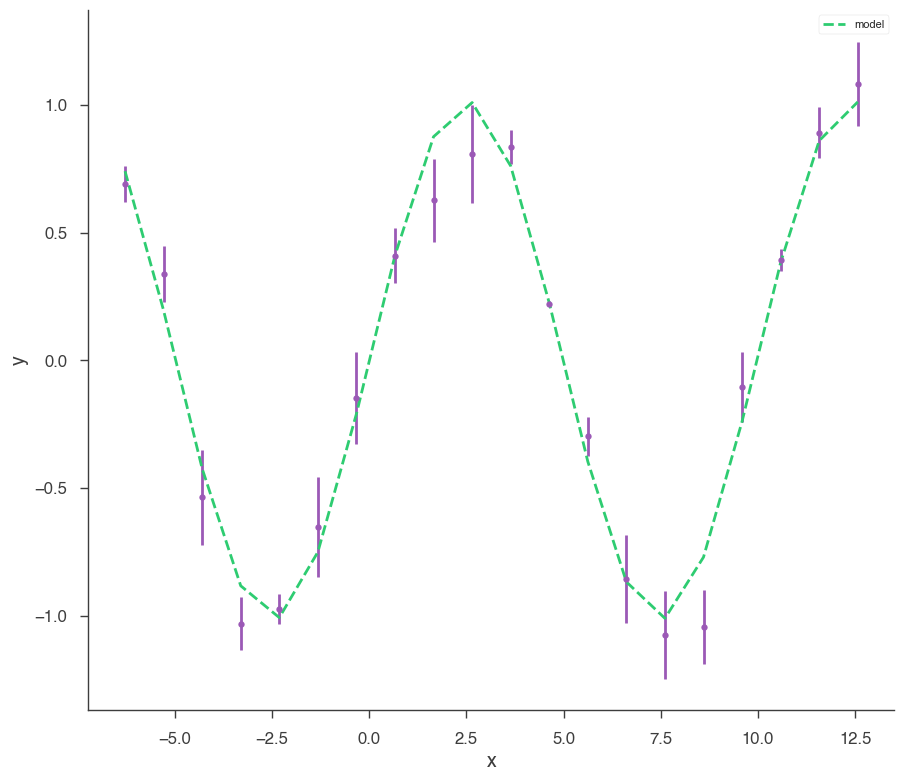

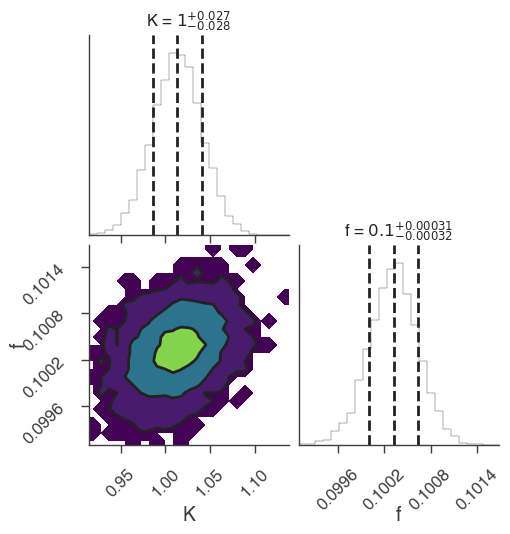

In [9]:
bayes_analysis.set_sampler("zeus")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## ultranest

23:59:10 INFO      sampler set to ultranest                                                ]8;id=412861;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=799310;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-8  


[ultranest] Likelihood function evaluations: 10875


[ultranest]   logZ = -17.82 +- 0.1008


[ultranest] Effective samples strategy satisfied (ESS = 976.4, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.07 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.42, need <0.5)


[ultranest]   logZ error budget: single: 0.14 bs:0.10 tail:0.41 total:0.42 required:<0.50


[ultranest] done iterating.


23:59:22 INFO      fit restored to maximum of posterior                                         ]8;id=20837;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=234440;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=781472;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=690167;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.013 -0.029 +0.027,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.0028 -0.0029 +0.004) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-8.443228
total,-8.443228


Values of statistical measures:

,statistical measures
AIC,21.592338
BIC,22.877920
DIC,20.798482
PDIC,1.961662
log(Z),-7.733344


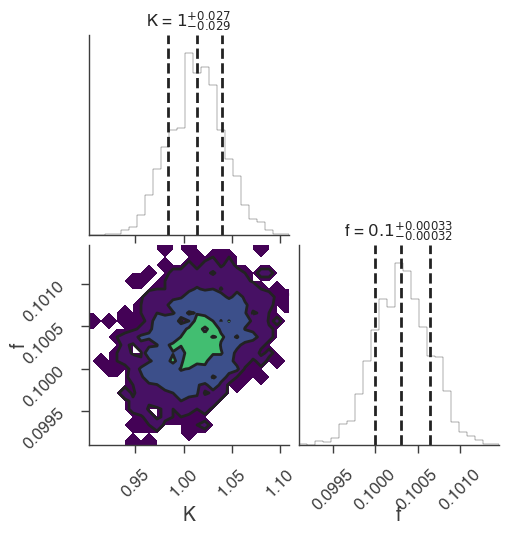

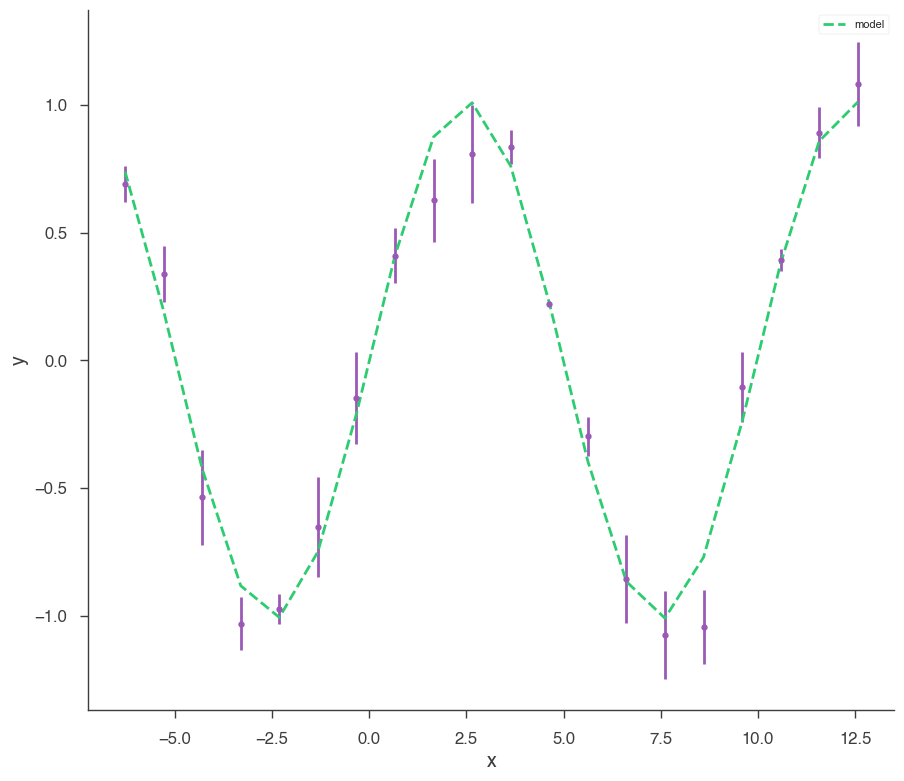

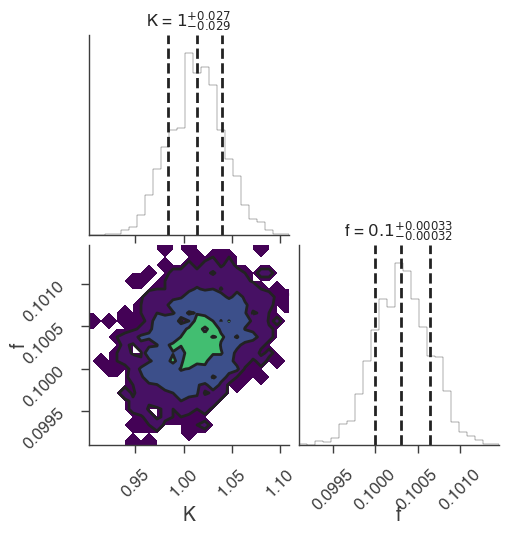

In [10]:
bayes_analysis.set_sampler("ultranest")
bayes_analysis.sampler.setup(
    min_num_live_points=400, frac_remain=0.5, use_mlfriends=False
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()